# Clustering

This file contains the different cluster methods.

# Table of Contents

1. [Introduction & Motivation](#intro) (Sebastian/Skyler)
2. [What even is Clustering anyway?](#cluster) (Yannik/Skyler)
3. [Performance Metric - Silhouette Score and Fowlkes-Mallows Index](#perfom) (Debasmita/Sebastian)
4. [Surrogate Data & Yannik's Class](#class)
5. [Clustering Algorithms](#algos)<br>
    1. [Partion](#partition)<br>
         1. [K-Means](#kmeans) (Skyler) <br>
         2. [Spectral Clustering](#spectral) (Sebastian) <br>
    2. [Hierarchical](#hier)
        1. [Agglomerative Clustering](#agglo) (Sebastian/Skyler)
        2. [BIRCH Clustering](#birch) (Sebastian)
    3. [Density-Based](#density) (Debasmita)
        1. [DBSCAN](#dbscan) 
        2. [HDBSCAN](#hdbscan)
    4. [Expectation Maximization](#em) (Yannik)
    5. [Affinity Propagation](#ap) (Debasmita)

# 1. Introduction & Motivation <a name="intro"/>

All of our group members shared the same motivation for this project: We wanted to learn about different clustering algorithms with a focus on their theoretical foundations and underlying concepts. In so doing, we wanted to produce a notebook with detailed explanations regarding different clustering algorithms, which should serve as a useful future reference when implementing a clustering algorithm. We specifically did not want to solve a particular optimization task, i.e. applying a specific algorithm to a real-world dataset and optimizing for a specific performance metric. 

So, what can you, the reader, expect from this document? Essentially, we analyzed and described a number of well-known categories of clustering algorithms and implemented them in Python:  
- K-Means and Spectral Clustering (both Partition); 
- Agglomerative Clustering and BIRCH Clustering (both Hierarchical); 
- DBSCAN and HDBSCAN (Density-based); 
- Expectation Maximization;
- Affinity Propagation. 

Ultimately our purpose here is to endow the reader with a functional understanding of how some key clustering algorithms work, rather than providing a comprehensive deep-dive into any one topic/algorithm.

# 2. What even is Clustering anyway?  <a name="cluster"/>

Perhaps the most salient characteristic that one needs to understand about clustering algorithms is that they are employed in an **Unsupervised Learning** context. What that means is that the data these algorithms deal with is unlabelled; it is left up to the algorithm to find any patterns/similarities therein. Broadly, clustering algorithms assess the similarities between the different observations in a given dataset, with those observations manifesting a high degree of similarity being grouped together as a cluster. 

For those already possessing some degree of familiarity with Machine Learning, this idea of "finding similar observations and assigning said observations to a kind of group" might sound quite similar to **Classification**. So how then is Clustering different from Classification? The key differentiator between the two is that as discussed Clustering is used for Unsupervised Learning (unlabelled data) whereas Classification is used for Supervised Learning (labelled data). As a result, the categories (classes) to which observations are assigned by classification algorithms are fixed, while with clustering algorithms the clusters themself change iteratively during the course of running the algorithm. 

# 3. Performance Metric - Silhouette Score  and Fowlkes-Mallows Index<a name="perfom"/>

## Evaluation Metric ##
Clustering is evaluated based on some similarity or dissimilarity measure such as the distance between cluster points. If the clustering algorithm separates dissimilar observations apart and similar observations together, then it has performed well. There are few evaluation metrics for clustering algorithms viz. Davies-Bouldin Index, Rand index, Silhouette coefficient, Fowlkes-Mallows Index etc.  Here we will explore the Silhouette coefficient and the Fowlkes-Mallows Index.

### Silhouette coefficient ###

Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). 
The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

The formula for silhouette coefficient for an instance or data point $i$ is 

$$sc(i) = \frac{(b_i - a_i)}{max(a_i, b_i)}$$

where $a_i$ is the mean distance between $i$ and all other data points in the same cluster and $b_i$ is the mean distance to the other data points in the next closest cluster. Thus $a_i$ is a measure of compactness of $i$’s cluster, and $b_i$ is a measure of distance between the clusters.

We define the silhouette score of a clustering to be the mean silhouette coefficient over all instances or data points.

#### Score interpretation ####
The silhouette coefficient varies from -1 to +1. A value of +1 means the instance is close to all the members of its
cluster, and far from other clusters; a value of 0 means it is close to a cluster boundary; and a value of -1 means it may be in the wrong cluster. 



#### Advantages ####
The score is higher when the obversations within a given cluster are densely packed together while the clusters themselves are well-separated from one another. 

It can be informative to look at the individual silhouette coefficients, and not just the final mean score. 
We can plot these in a silhouette plot, as shown below, where each colored region corresponds to a different cluster. We can also use the silhouette plot to look at the size of each cluster, even if the data is not 2d.  The wider the shape, the greater number of samples are present in the cluster. Thus, silhouette plots and means may be used to determine the natural number of clusters within a dataset. When interpreting a silhouette plot, one will notice how the edge of the bars representing each cluster approximately ressembles the shape of a ship's hull. Essentially, the reason for this is that the bar for a given cluster is actually made up of a multitude of smaller bars which represent each point within that cluster, and the individual Silhouette scores for each of these points determines the length of the corresponding bar. The Silhouette plot is constructed such that each cluster starts with the component observations with the highest Silhouette scores and works down from there. This is the reason for the hull shape, and it also explains why the different clusters will have different widths, as each point within every cluster effectively has its own mini-bar that constitutes part of the larger bar for the cluster as a whole.

Let's look at two examples of silhouette plot, one representing a good number of clusters and one representing a bad number of clusters. When setting the number of clusters equal to six, we can already infer by looking at the plot that six yields a poor performance (six is too large). The majority of instances belonging to cluster 0, 2, 4 and 5 have a silhouette coefficient (much) smaller than the mean silhouette score. Only for cluster 1 and 3, most instances have a score to the right of the dashed line. If we now examine the silhouette plot for four clusters, we can see that we have one very good result for cluster 2 as almost every data point has a silhouette coefficient greater than the dashed line. This is obvious as cluster 1 is very far away from all other clusters. Moreover, we have decent results for cluster 0 and 2, albeit not ideal. Nevertheless, the majority of instances receive a better score than the average. Only for cluster one, most of the data points have a smaller silhouette coefficient than the dashed line. In comparison to the silhouette plot for six clusters, four seems to be a much better choice as more instances exceed the dashed line and are closer to the right, i.e. 1.0.

For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


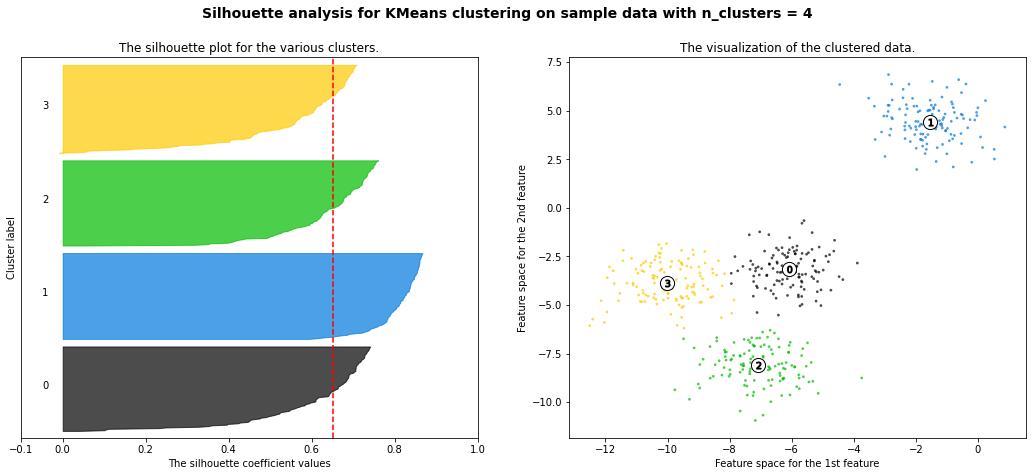

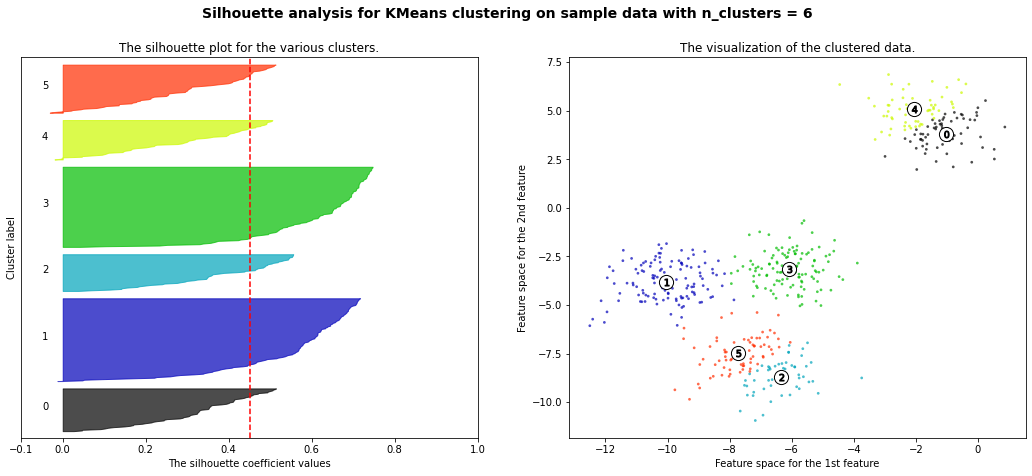

In [16]:
from Silhouette_score_sklearn import silhouette_score_sklearn
silhouette_score_sklearn()

#### Drawbacks ####
The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density-based clusters like those obtained through DBSCAN. To dive into this a bit deeper, let's recall the definition of a convex set. In geometry, a subset of a Euclidean space, is convex if, given any two points, it contains the whole line segment that joins them. Equivalently, a convex set or a convex region is a subset that intersects every line into a single line segment. For example, a solid cube is a convex set, but anything that is hollow or has an indent, for example, a crescent shape, is not convex.

![Convex-Non-convex%20Set.PNG](Convex-Non-convex%20Set.PNG)

In a non-convex shape, there will be some pair of points which are close to each other but belong to different clusters and some pair of points which are far apart but belong to same cluster. This will lead to a low Silhouette score. Hence evaluating a non-convex dataset with the Silhouette score will not generally make sense. Additionally, the outliers detected in the density-based algorithm will not be assigned to any clusters and this will make a significant difference in the silhouette scores as well as the metric is sensitive to outliers.

### Fowlkes-Mallows Index ###

Another metric to gauge the performance of a clustering algorithm is the **Fowlkes-Mallows index (FMI)**. The FMI can only be used when the ground truth, i.e. the cluster for each instance in the data set, is known. The FMI is defined as the geometric mean of the pairwise [precision and recall](https://scikit-learn.org/stable/modules/clustering.html#fowlkes-mallows-scores). 

$$
FMI = \frac{TP}{\sqrt{(TP+FP)(TP+FN)}} = \sqrt{\frac{TP}{(TP+FP)} * \frac{TP}{(TP+FN)}} = \sqrt{Precision * Recall}
$$ 

- **TP**: number of True Positives (i.e. the number of pairs of points that belong to the same clusters in both the true labels and the predicted labels);
- **FP**: the number of False Positives (i.e. the number of pairs of points that belong to the same clusters in the true labels and not in the predicted labels);
- **FN**: the number of False Negatives (i.e the number of pairs of points that belongs in the same clusters in the predicted labels and not in the true labels).

#### Score interpretation ####
The FMI can take values in the range of 0 to 1. The higher the value of the FMI, the greater the similarity between the clusters and the ground truth (benchmark classifications). The FMI is implemented in Scikit-Learn with `sklearn.metrics.fowlkes_mallows_score`.

Let's assume the following example (please ignore the coloring for now, clusters are indicated by the respective number): <br>
The labels of the ground truth are: [<span style="color: red;">0</span>, <span style="color: green;">0</span>, <span style="color: blue;">0</span>, <span style="color: purple;">1</span>, <span style="color: orange;">1</span>, <span style="color: black;">1</span>] <br>
The lables resulting from a clustering algorithm are: [<span style="color: red;">0</span>, <span style="color: green;">0</span>, <span style="color: blue;">1</span>, <span style="color: purple;">1</span>, <span style="color: orange;">2</span>, <span style="color: black;">2</span>] <br>

*Note:* In the following, two pairs of points will be displayed, where the first array represents the labels of the points of the ground truth while the second array represents the labels of the points using a clustering algorithm.

**TP**: 2 <br>
The points belong to the same cluster for both the ground truth and using a clustering algorithm.
- Pair <span style="color: red;">1</span> and <span style="color: green;">2</span> ([<span style="color: red;">0</span>, <span style="color: green;">0</span>]), ([<span style="color: red;">0</span>, <span style="color: green;">0</span>])
- Pair <span style="color: orange;">5</span> and <span style="color: black;">6</span> ([<span style="color: orange;">1</span>, <span style="color: black;">1</span>]), ([<span style="color: orange;">2</span>, <span style="color: black;">2</span>]);

**FP**: 4 <br>
The points are in the same cluster for the ground truth, but in a separate cluster using a clustering algorithm.
- Pair <span style="color: red;">1</span> and <span style="color: blue;">3</span> ([<span style="color: red;">0</span>, <span style="color: blue;">0</span>]), ([<span style="color: red;">0</span>, <span style="color: blue;">1</span>]); 
- Pair <span style="color: green;">2</span> and <span style="color: blue;">3</span> ([<span style="color: green;">0</span>, <span style="color: blue;">0</span>]), ([<span style="color: green;">0</span>, <span style="color: blue;">1</span>]); 
- Pair <span style="color: purple;">4</span> and <span style="color: orange;">5</span> ([<span style="color: purple;">1</span>, <span style="color: orange;">1</span>]), ([<span style="color: purple;">1</span>, <span style="color: orange;">2</span>]); 
- Pair <span style="color: purple;">4</span> and <span style="color: black;">6</span> ([<span style="color: purple;">1</span>, <span style="color: black;">1</span>]), ([<span style="color: purple;">1</span>, <span style="color: black;">2</span>]);

**FN**: 1 <br>
The points are in the same cluster using the clustering algorithm (1), but in a separate cluster using the ground truth (0, 1).
- Pair <span style="color: blue;">3</span> and <span style="color: purple;">4</span> ([<span style="color: blue;">0</span>, <span style="color: brown;">1</span>]), ([<span style="color: blue;">1</span>, <span style="color: brown;">1</span>])

Thus, the FMI is calculated:

$$
FMI = \sqrt{\frac{2}{(2+4)} * \frac{2}{(2+1)}} = \sqrt{\frac{1}{3} * \frac{2}{3}} = \sqrt{\frac{2}{9}} = 0.47
$$ 

#### Advantages ####
One major advantage of the FMI is that it does not make any assumption on the cluster structure. Thus, it is both applicable for clustering algorithms such as K-means which assumes isotropic blob shapes as well as spectral clustering algorithms which can find clusters with “folded” shapes. Moreover, the FMI is upper-bound where a value of one indicates perfect agreement.

#### Drawbacks ####
The major disadvantage of the FMI is that it requires the knowledge of the ground truth classes. In reality, this will most likely not be the case. Nevertheless, for our assignment where we use surrogate data, this drawback does not apply as we do indeed have knowledge about the ground truth.

# 4. Surrogate Data & Yannik's Class <a name="class"/>

The package `sklearn` has a module called `datasets`. Within this package there are ~30 functions, which load sample data. All of these functions start with `load_...`. Moreover, this package has ~20 sample generators. These sample generators create surrogate data, which is separated differently based on the function. They all start with `make_...`. For a more exhaustive description of these functions please review the `sklearn` documentation found in the according bibliography [2].

The first step is to import that module from sklearn. We will also import matplotlib to plot what we have just created.

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

## `make_blobs`

The first function we can use to create surrogate data is the function called `make_blobs`. This creates Gaussian blobs for clustering. With the parameter `n_samples` one can influence the total number of points generated, with the `centers` parameter one can set the number of centers, viz. different classes for a classification problem, and with the `cluster_std` one can set the standard deviation around each center (i.e. the higher the `cluster_std` the higher the "noise" around the centers).

The function returns two values. One is the `X` variable, which contains the different data points, and one is the `y` variable which contains the different labels for the data points. Through the `y` variable, we can check later how well/poor the clustering algorithm performed.

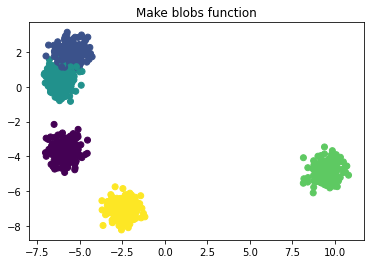

In [3]:
X, y = datasets.make_blobs(n_samples = 1000, centers = 5, cluster_std = 0.5)
plt.scatter(X[:,0], X[:,1], c = y)
plt.title("Make blobs function")
plt.show()

## `make_circles`

The second function is called `make_circles`, which returns a circle within another circle, as shown below. This function also has different classes, as manifested by the different colors. For this exercise we will use the parameter `n_samples`, which works the same as it does in the `make_blobs` function, and the `noise` parameter, which works the same as the `cluster_std` parameter from the `make_blobs` function.  

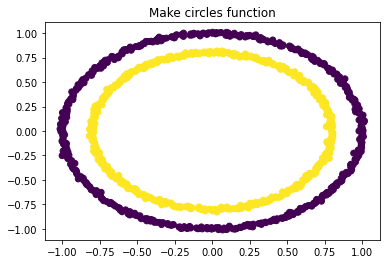

In [4]:
X, y = datasets.make_circles(n_samples = 1000, noise = 0.01)
plt.scatter(X[:,0], X[:,1], c = y)
plt.title("Make circles function")
plt.show()

## `make_moons`

This function creates two interweaving half circles. It takes the arguments `n_samples` and `noise`, as with the `make_circles` function.

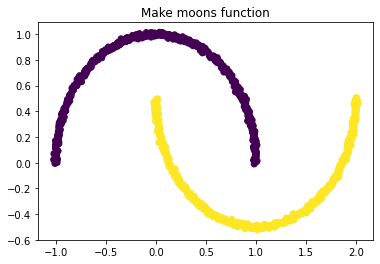

In [7]:
X, y = datasets.make_moons(n_samples = 1000, noise = 0.01)
plt.scatter(X[:,0], X[:,1], c = y)
plt.title("Make moons function")
plt.show()

In order to create an easier way to compare all of the different clusters we decided to write a function which does it all for us, namely a function that creates the surrogate data in one place and also plots the given cluster algorithm to the surrogate data. The class we wrote is called `Surrogate_data`. It has several private functions, which are all leveraged in the `plot_raw_vs_predict` function. That function returns the surrogate data in comparison to the fitted data. Using a generic function for creating the same surrogate data time and again has the benefit that one can easily compare the different clustering algorithms. 

In the next line we will import that self written class.

In [8]:
from Surrogate_data import Surrogate_data
evaluate = Surrogate_data()

# 5. Clustering Algorithms <a name="algos"/>

Within this chapter we will offer deeper insights into different clustering algorithms. They are further separated into different sub-chapters. It will start with partition clustering algorithms.

## A. Partition <a name="partition"/>

A key characteristic of Partition Clustering algorithms is that they require the user to specify the number of clusters which the algorithm will find. Possessing at least some degree of domain knowledge and/or insight into the dataset is quite helpful in this regard, as otherwise the number of clusters formed is arbitrary and hence is not likely to reflect the inherent number of clusters within the data. On the other hand, the fact the programmer specifies the number of clusters to be identified does help Partition Clustering algorithms to be relatively efficient (computationally) when compared with other clustering algorithms. Partition Clustering algorithms cluster all data points, regardless if a given data point could be reliably said to be part of a cluster.

### a. K-Means <a name="kmeans"/>

#### General Description & Application
K-means is a very popular Partition Clustering algorithm. Essentially, the user specifies the number of clusters to be identified, and the algorithm iteratively adjusts the clusters by moving what are known as **Centroids** in a manner that minimizes the distance of the data points to the Centroid to which they are assigned. In so doing the specific Centroid to which a given datapoint is assigned can change, as the datapoints are assigned to the nearest Centroid and as mentioned the Centroids iteratively change locations accordingly.    

The major benefit of K-means is its minimal computational cost - it is a relatively simple and efficient algorithm that is well-suited to working with large datasets. However, as discussed in the description of Partition Clustering algorithms more broadly this can also be a downside, especially without domain knowledge and/or insight into the dataset. Furthermore, as with other Partition Clustering algorithms the K-means algorithm will assign all points to a cluster, irrespective of whether a given point is actually part of a cluster. 

#### Steps
The K-means algorithm can be broken down into four specific steps: 
1. Determine K, the number of clusters to be identified.
2. Select K data points to serve as the initial centroids.
3. Assign each data point to the closest centroid.
4. Move the centroids according to the new "average location" of the data points assigned to each centroid. $\newline$

$\underline{Note}$: Steps 3 and 4 are repeated until there are no further changes to the clusters to which each data point is assigned or once the `max_iter` parameter has been reached. In order try and find a global rather than a local maximum, the algorithm is initialized with different centroid seeds `n_init` times, meaning that the total number of times the algorithms is effectuated is the product of the `n_init` and `max_iter` parameters.


#### Select Parameters (Scikit Learn Implementation)
`n_clusters`: The number of clusters to form, which is also the number of centroids to generate.
$\newline$
`n_init`: Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
$\newline$
`max_iter`: Maximum number of iterations of the k-means algorithm for a single run.
$\newline$
**Note**: Parameter names and descriptions were obtained from the official Scikit Learn documentation (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

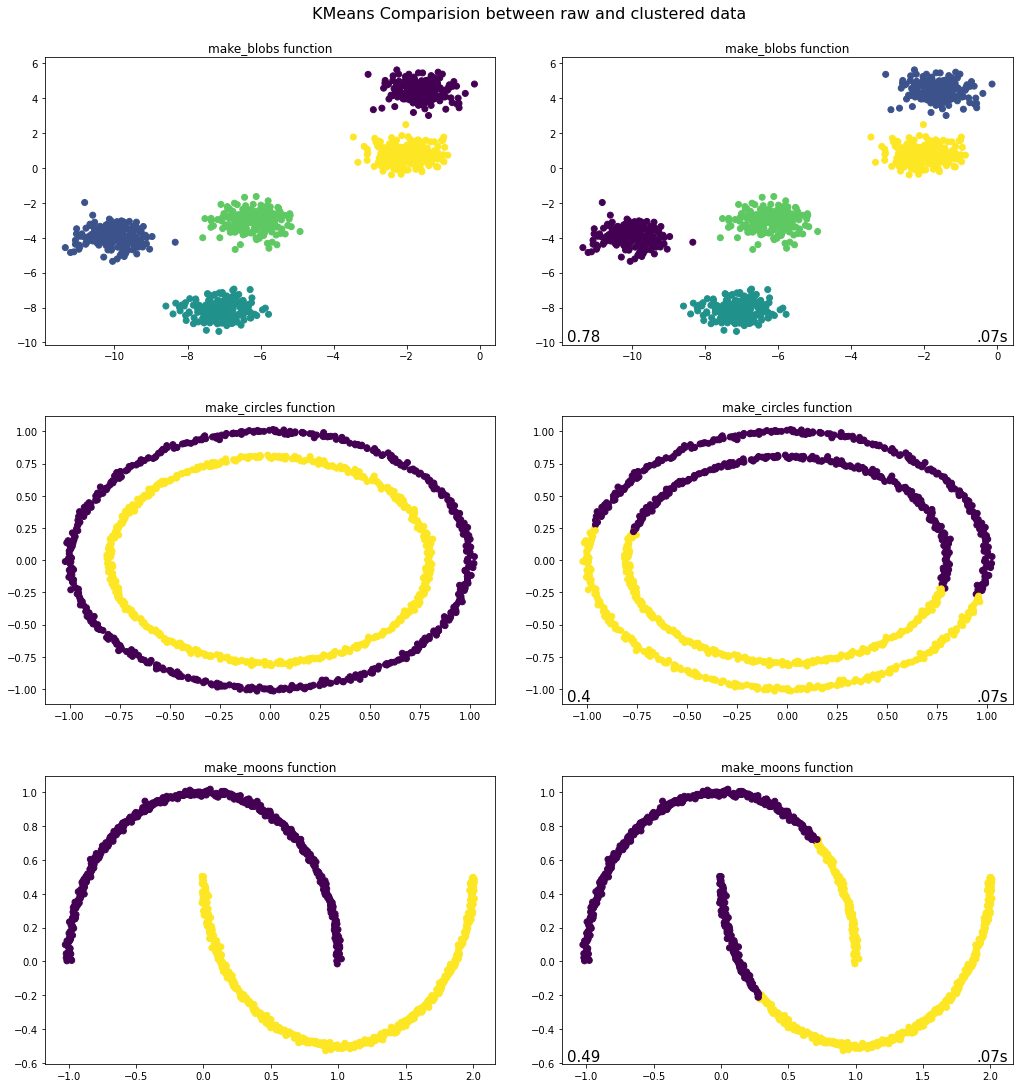

In [9]:
from sklearn.cluster import KMeans
evaluate.plot_raw_vs_predict(KMeans)

### Takeaways from K-means Python Implementation

Of the three tests conducted above, the K-means algorithm only worked with the `make_blobs` function where it correctly identified the five clusters present including all constituent observations. The same cannot be said for the bottom two graphs, where the K-means algorithm is unable to differentiate between the inner and outer rims or between the two moons. The reason for this has to do with the fact that the clusters formed through the `make_blobs` function are convex (which K-means can handle) whereas those formed by the other two functions are not convex and hence the K-means algorithm is unable to accurately identify the clusters contained therein. 

### b. Spectral Clustering <a name="spectral"/>

#### General Description & Application

The idea of spectral clustering is rooted in graph theory. The spectral clustering algorithm aims to identify communities of nodes in a graph based on connections between them. It can be understood as aiming to maximize the number of within-cluster connections and to minimize the number of between-cluster connections. The spectral clustering algorithm also allows for clustering of non graph data. Thus, points that are (immediately) next to each other, i.e. closely connected, are identified in dataset.

The spectral clustering algorithm utilizes information from the eigenvalues and eigenvectors of the Laplacian Matrix. The calculation of the (unnormalized) Laplacian Matrix will be explained in more detail in a bit. In the end, a standard clustering algorithm, such as KMeans, is applied on the relevant eigenvectors of the Laplacian Matrix to identify clusters in the dataset.

We will now briefly outline some advantages and disadvantages of the spectral clustering algorithm. The spectral clustering algorithm is generally able to capture complex data structures as it does not make an assumption about the shape/form of the clusters. Nevertheless, the spectral clustering algorithm still requires us to specify the number of clusters beforehand as indicated by the `n_cluster` hyperparamter. In that sense, it has the same disadvantage as K-Means. Furthermore, the spectral clustering algorithm groups every individual data point to a cluster, which means it may also cluster noise. Additionally, it is computationally expensive for large datasets.

#### Steps
The general process of the spectral clustering algorithm implemented in [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) with the function `sklearn.cluster.SpectralClustering` can be illustrated by the following steps:
1. Construct the Affinity Matrix based on the datapoints
2. Create the Degree Matrix based on the Affinity Matrix
3. Construct the Laplacian Matrix by subtracting the Affinity matrix from the Degree Matrix
4. Eigendecomposition of the Laplacian Matrix
5. Apply a standard clustering algorithm, e.g. KMeans, on the relevant eigenvectors of the Laplacian Matrix

The previously outlined steps will now be described in more detail: 

#### Step 1: Affinity Matrix 
The entries of an Affinity Matrix show how similar points are to each other. The higher the entry in a Affinity Matrix, the higher the similarity between the points. The Affinity Matrix can be constructed in different ways. Therefore, Scikit-Learn's [implementation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering)  includes the parameter *affinity*, which defines how to construct the Affinity Matrix. Four options are available: `nearest_neighbors`, `rbf`, `precomputed`and `precomputed_nearest_neighbors`.
- `nearest_neighbors` constructs the affinity matrix by computing a graph of nearest neighbors. If chosen, the hyperparameter `n_neighbors` also needs to be set as this determines the number of neighbors to use when constructing the affinity matrix.
- `rbf` constructs the affinity matrix using a radial basis function (RBF) kernel
- `precomputed` interprets X as a precomputed affinity matrix, where larger values indicate greater similarity between instances
- `precomputed_nearest_neighbors` interprets X as a sparse graph of precomputed distances, and construct a binary affinity matrix from the n_neighbors nearest neighbors of each instance

It will now be detailed, how the Affinity Matrix is constructed using `nearest_neighbors` and `rbf`, i.e. in those cases where no precomputed Affinity Matrix is provided:

**nearest_neighbors:**  
When setting the parameter *affinity* to `nearest_neighbors`, the Affinity Matrix is calculated using the k-nearest neighbors method. Thus, the number of neighbors to use when constructing the Affinity Matrix needs to be specified with the parameter `n_neighbors`. Let's call the matrix, which stores the relationships of k-nearest neighbours, *Connectivity Matrix*. If another datapoint belongs to the k-nearest neighbors, the Connectivity Matrix will indicate it with an entry of 1. If it does not belong to the k-nearest neighbors, it will be indicated with a 0. In Scikit-Learn, the Affinity Matrix is then calculated using the following [formula](https://github.com/scikit-learn/scikit-learn/blob/aa898de885ed4861a03e4f79b28f92f70914643d/sklearn/cluster/_spectral.py#L512):

$$
{Affinity\ Matrix} = 0.5 * ({Connectivity\ Matrix} + {Connectivity\ Matrix^T})
$$ 

Thus, each entry in the Affinity Matrix can only take up one of three possible entries: 1.0, 0.5 or 0.0. 
- `1.0` indicates that when calculating the closest k-nearest neighbors, both datapoints were amongst the respective nearest k-datapoints 
- `0.5` indicates that this was only true for one datapoint, i.e. only in one "direction"
- `0.0` indicates that for both datapoints, the other respective datapoint was not among the k-nearest

Let's assume the following example with n_neighbors = 2:

<div>
<img src="Spectral_Clustering/Affinity_Matrix_nearest_neighbor.png" width="700"/>
</div>

For data point 0, the k-nearest neighbors (including itself) are data point 0 and data point 1. For data point 1, only data point 1 and data point 2 are the k-nearest neighbors. In turn, the Affinity Matrix shows 0.5 at the entry row 0, column 1. 
*Note*: The parameter `include_self` is set to *True*, which means that each sample is marked as the first nearest neighbor to [itself](https://github.com/scikit-learn/scikit-learn/blob/aa898de885ed4861a03e4f79b28f92f70914643d/sklearn/cluster/_spectral.py#L510).

**rbf:**  
Setting the parameter *affinity* to `rbf`, i.e. also its [default setting](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html), the Affinity Matrix is constructed using a kernel function with Euclidean distance d(X, X), i.e. it calculates the pairwise distances of all points in our dataset *X*: 

`np.exp(-gamma * d(X,X) ** 2)`

The default for `gamma` is 1.0. Here, the entries of the Affinity Matrix can take any value between 0.0 and 1.0, where an increase in value corresponds to an increase in similarity.

<div>
<img src="Spectral_Clustering/Affinity_Matrix_rbf.png" width="700"/>
</div>

#### Step 2: Degree Matrix 
The Degree Matrix is a diagonal matrix, which is obtained by taking the sum of each row in the Affinity Matrix. The entries on the diagonal are called *degree*. Thus, the closer the individual points are group together, the higher the entry in the diagonal as each individual entry in the rows of the Affinity Matrix will be larger. At the same time, if the points are spread out further, the individual entries in the rows of the Affinity Matrix are smaller, which in turn leads to a smaller sum of the row.

#### Step 3: Laplacian Matrix
The (unnormalized) Laplacian Matrix is calculated by subtracting the Affinity Matrix from the Degree Matrix.

$$
L = D - A
$$

The (unnormalized) Laplacian Matrix has among others the following [basic properties](http://www.tml.cs.uni-tuebingen.de/team/luxburg/publications/Luxburg07_tutorial.pdf):
- L is symmetric and positive semi-definite
- The smallest eigenvalue of L is 0, the corresponding eigenvector is the constant one vector 
- L has n non-negative, real-valued eigenvalues 0 = $λ_1$ ≤ $λ_2$ ≤ . . . ≤ $λ_n$

*Note:* There are several other variants of the Laplacian Matrix as well as spectral clustering algorithms, which were out of the scope of this assignment as we did not solely focus on this type of algorithm.

In the following, the Affinity Matrix, Degree Matrix and Laplacian Matrix are illustrated for the example using `rbf` for the parameter *affinity*.

<div>
<img src="Spectral_Clustering/Laplacian_Matrix_rbf.png" width="700"/>
</div>

#### Step 4: Eigendecomposition of Laplacian Matrix
In the next step, the eigenvalues and eigenvectors of the Laplacian Matrix are calculated. As already outlined in our introduction to *Partition Clustering*, determining the number clusters in a dataset is generally a difficult task. Similar to the *elbow plot*, which may be used when determining the "right" number of clusters for the KMeans algorithm, we can make use of the eigengap heuristic in spectral clustering. The goal is to identify the first large gap between the eigenvalues, which are ordered increasingly. Thus, we choose the number of clusters such that all eigenvalues $λ_1$,..., $λ_k$ are minuscule and $λ_{k+1}$ is comparatively large. The number of eigenvalues $λ_1$,..., $λ_k$ before this gap generally correspond to the number of clusters in our dataset.

As can be seen by the following stylized examples, we can identify a gap between eigenvalues number two and three as well as between number four and five, which in turn helps to determine the "right" number of clusters. 

<div>
<img src="Spectral_Clustering/Eigenvalues_Laplacian.png" width="700"/>
</div>

*Note:*
Thoses examples are just for illustration of the eigengap heuristic. Here, kmeans could easily be applied and would yield a good and fast solution. Furthermore, it has to be noted that the parameter `n_cluster` needs to be specified before the spectral clustering algorithm is run. Thus, the visualization of the eigengap heuristic is just used to illustrate the information content of the eigenvalues of the Laplacian Matrix. It should not be understood as a step, which can be performed when calling `sklearn.cluster.SpectralClustering`.

#### Step 5: Application of standard clustering algorithm 
The k eigenvectors associated with the k smallest eigenvalues are used for the partitioning of the dataset, except for the eigenvector corresponding to the first eigenvalue as this eigenvalue will always have a value of zero (see properties further above). A standard clustering algorithm is applied on the set of eigenvectors. The default clustering algorithm is KMeans.

#### Select Parameters (Scikit Learn Implementation)
**n_cluster:** The parameter *n_clusters* defines the dimension of the projection subspace, i.e. the number of clusters.

**eigen_solver:**
This parameter determines which eigenvalue decomposition strategy to use.

**affinity:** 
This parameter defines how to construct the affinity matrix. Four options are available: `nearest_neighbors`, `rbf`, `precomputed`and `precomputed_nearest_neighbors` (see above).

**n_init:**  
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. Only used if assign_labels='kmeans'.

**assign_labels:**  
The strategy for assigning labels in the embedding space, i.e. the clustering algorithm. There are two ways to assign labels after the Laplacian embedding: `kmeans` and `discretize`. k-means is a popular choice, but it can be sensitive to initialization. Discretization is another approach which is less sensitive to random initialization`

**Note**: Parameter names and descriptions were obtained from the official Scikit Learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering).


c:\users\skyle\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\skyle\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\skyle\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\skyle\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may n

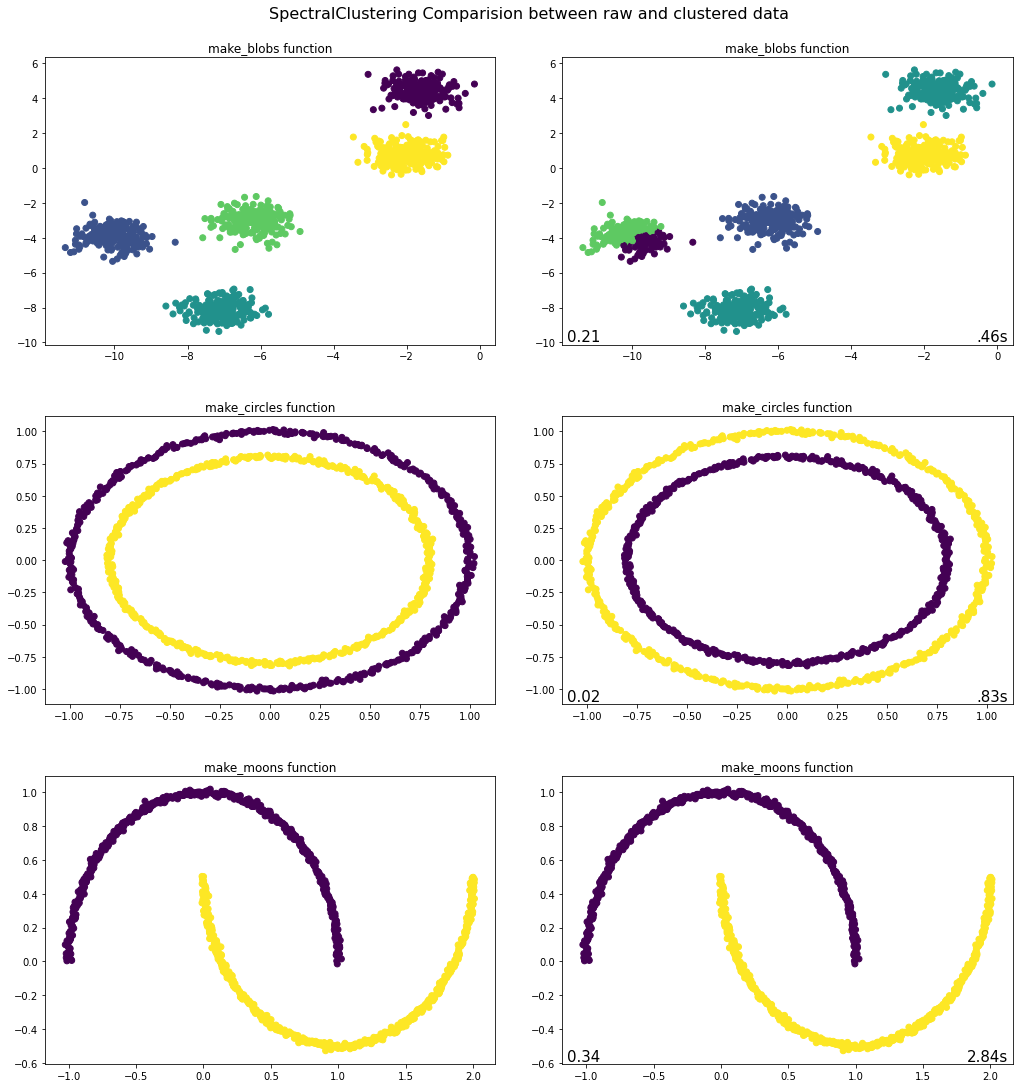

In [10]:
from sklearn.cluster import SpectralClustering
evaluate.plot_raw_vs_predict(SpectralClustering, assign_labels = "kmeans", affinity = "nearest_neighbors")

### Takeaways from Spectral Clustering Python Implementation

The Spectral Clustering algorithm worked well for all three tested datasets. Thus, contrary to K-means, it also performed well for both `make_circles` and `make_moons`. This is because Spectral Clustering also works for non-spherical datasets, i.e. it is able to capture complex cluster structures. Therefore, Spectral Clustering might be a good option to utilize when the dataset is non-spherical, i.e. when the K-means algorithm fails. Nevertheless, one has to keep in mind that Spectral Clustering is computationally expensive; compared to K-means, the Spectral Clustering algorithm took significantly longer. Thus, when faced with a dataset, which can be clustered using K-means, one should generally choose K-means instead of Spectral Clustering.

## B. Hierarchical <a name="hier"/>

Hierarchical Clustering algorithms create a hierarchy of clusters using a predefined criterion such as Single-Link (comparing the observation to the closest point in each cluster) vs. Complete-Link (comparing the observations to the farthest point in each cluster). Hierarchical Clustering algorithms will stop running when either (1) the specified number of clusters has been obtained, or (2) the linkage distance threshold has been reached. As with Partition Clustering, Hierarchical Clustering algorithms cluster all observations in the dataset.

At a high level, we can think of an entire dataset as being a single cluster, irrespective of how dispersely the datapoints contained therein are distributed. Along a similar train of thought, the most granular way to cluster a dataset would be to assign each datapoint to its own cluster; in the context of Hierarchical Clustering these are known as **singletons**. So, with hierarchical clustering algorithms what we have is a way to outline the different ways in which a given dataset can be clustered, ranging from a single cluster that contains the entire dataset to *n* clusters where *n* is equal to the number of datapoints. This range or "hierarchy" of clusters can be thought of as representing different degrees of granularity in terms of the similarity between the data points, where the singletons are the most granular groupings as each data point has its own cluster.

Hierarchical clustering algorithms can be further categorized based on whether a **top-down** or a **bottom-up** approach is used to cluster the data. With a top-down approach, the algorithm starts with the dataset as a whole (one cluster) and iteratively breaks it down into increasingly smaller clusters. Conversely, with a bottom-up approach the algorithm starts with the singletons as individual clusters (that is the initialization step) and iteratively combines them into ever-larger clusters. As mentioned, the deciding factor in terms of how the hierarchy of the clusters is formed is the stipulated distance metric, irrespective of whether a top-down or a  bottom-up approach is followed.

A common and very useful visual representation of how hierarchical clustering algorithms work is known as a "dendrogram", which our Python implementation provides for each of the two hierarchical clustering algorithms we researched. Essentially, this can be thought of as a hierarchical tree of clusters, with bottom row representing the singletons which progressively weave together until they are all attached via the uppermost node. 

Our discussion of Hierarchical Clustering algorithms focuses on two specific algorithms: (1) Agglomerative Clustering and (2) Birch Clustering.

### a. Agglomerative Clustering <a name="agglo"/>

#### General Description & Application

Agglomerative Clustering employs a bottom-up approach; the algorithm starts with the individual singletons and iteratively combines them into ever-larger clusters until either (1) the specified *n_clusters* parameter is reached, or (2) the specified distance threshold is reached. If the distance threshold is too large than a single "cluster" that contains the entire dataset will be returned. With Agglomerative Clustering each iteration reduces the number of clusters by one.

Relative to top-down hierarchical clustering algorithms Agglomerative Clustering is much less efficient computationally. That said, the greater computational burden of this algorithm does help to ensure nearby points are assigned to the appropriate cluster. 

#### Steps
The Agglomerative Clustering algorithm can be broken down into three distinct steps:
1. Initialize *n* singleton clusters, where *n* is the number of datapoints.
2. Determine those two clusters that are closest together, based on the specified distance metric.
3. Merge the two clusters identified in Step 2 into a single cluster.

$\underline{Note}$: Steps 2 and 3 are repeated until either (1) the specified number of clusters has been obtained, or (2) the linkage distance threshold has been reached.

#### Select Parameters (Scikit Learn Implementation)
`n_clusters`: The number of clusters to find. It must be ``None`` if ``distance_threshold`` is not ``None``.
$\newline$
`affinity`: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or “precomputed”. If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.
$\newline$
`linkage`: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

- ‘ward’ minimizes the variance of the clusters being merged.

- ‘average’ uses the average of the distances of each observation of the two sets.

- ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

- ‘single’ uses the minimum of the distances between all observations of the two sets.

`distance_threshold`: The linkage distance threshold above which, clusters will not be merged. If not ``None``, ``n_clusters`` must be ``None`` and ``compute_full_tree`` must be ``True``.
$\newline$
**Note**: Parameter names and descriptions were obtained from the official Scikit Learn documentation (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

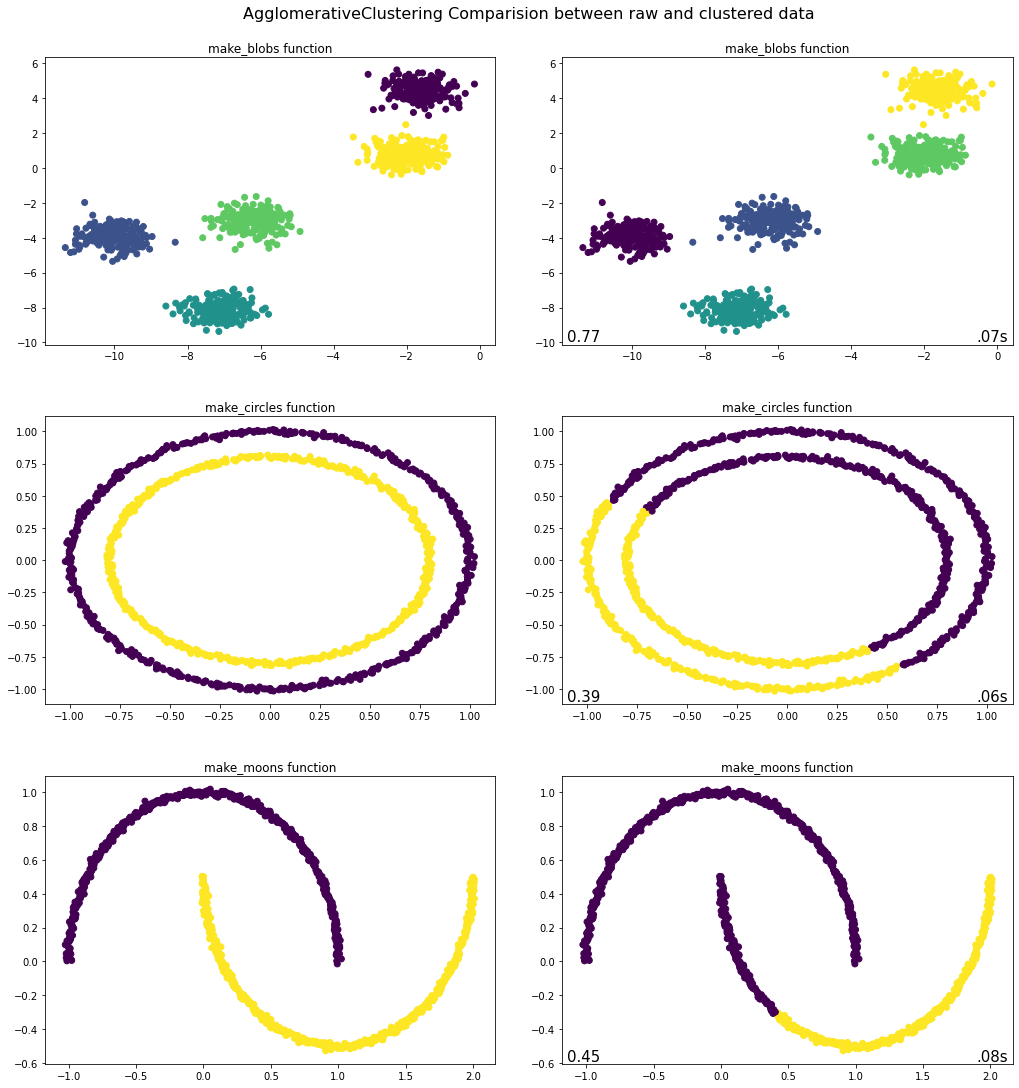

In [18]:
from sklearn.cluster import AgglomerativeClustering
evaluate.plot_raw_vs_predict(AgglomerativeClustering)

### Takeaways from Agglomerative Clustering Python Implementation

Of the three tests conducted above, the Agglomerative Clustering algorithm only worked with the `make_blobs` function where it correctly identified the five clusters present including all constituent observations. The same cannot be said for the bottom two graphs, where the Agglomerative Clustering algorithm is unable to differentiate between neither the inner and outer rims nor between the two moons. The reason for this has to do with the linkage method employed, which in this case is *Ward* - the default setting in Scikit-Learn. The linkage criterion determines how the distance between sets of observations is computed, which will of course have a major impact on how the clusters are formed. With the `ward` linkage method, the algorithm minimizes the variance of the clusters being merged, which why the `make_blobs` function works properly when this parameter setting is used. If however the `single` linkage method was used, then the `make_blobs` function would not properly cluster the data whereas the `make_circles` and `make_moons` functions would.

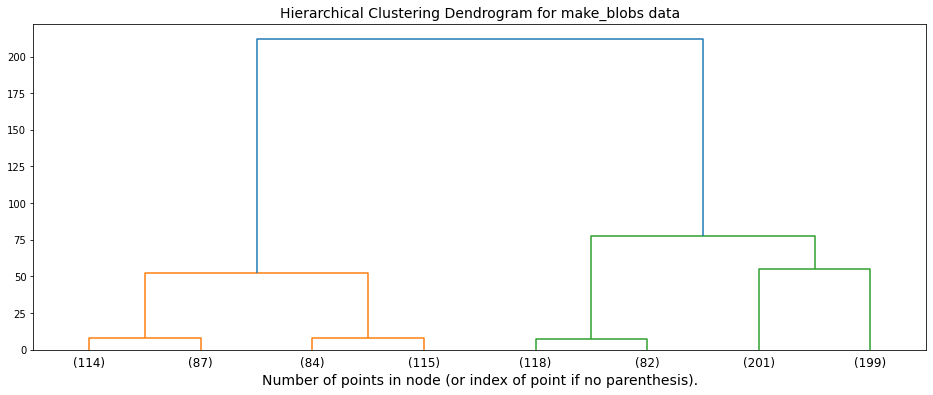

In [19]:
from dendrogram import plot_dendrogram
import time
from IPython.display import clear_output

# set the dataset for which the dendrogram should be drawn. Possible options are:
# ['make_blobs',
#  'make_circles',
#  'make_moons']

datasets = "make_blobs"

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(next((i[0] for i in evaluate.datasets if i[2] == datasets), None))

# plot the top three levels of the dendrogram
for i in range(1, 3):
    plot_dendrogram(model, datasets=datasets, truncate_mode='level', p=i)
    time.sleep(2)
    clear_output(wait = True)

### b. BIRCH Clustering <a name="birch"/>

### General Description & Application

BIRCH is an acronym that stands for **B**alanced **I**terative **R**educing and **C**lustering using **H**ierarchies. The algorithm was introduced in 1996 by Tian Zhang, Raghu Ramakrishnan and Miron Livny in their [article](https://www2.cs.sfu.ca/CourseCentral/459/han/papers/zhang96.pdf) *BIRCH: An Efficient Data Clustering Method for Very Large Databases*. 

As can already be inferred from the title, BIRCH is designed when clustering very large datasets. BIRCH takes the fact that the amount of memory is generally limited into account, i.e. the size of the dataset generally exceeds the available memory. Thus, BIRCH aims to minimize I/O costs as it does not require the entire dataset to be memorized. The algorithm can yield a satisfactory clustering of the dataset with just a single scan thereof. To increase the performance, just a few additional scans of the dataset are needed.

BIRCH belongs to the category of Hierarchical Clustering algorithms. In contrast to Agglomerative Clustering, it uses a top-down-approach instead of a bottom-up-approach. The *Clustering-Feature (CF)* and the *CF-Tree* are two key concepts of the algorithm. Based on the data set, BIRCH constructs a *Clustering Feature Tree (CF-Tree)*. The CF-Tree consists of *Clustering Feature nodes (CF Nodes)*, which in turn contain *Clustering Features*. Clustering Features basically summarize relevant statistical metrics for the given cluster. Thus, BIRCH allows for clustering of larger data sets by first generating a compact summary of the large data set that preserves as much information as possible. Secondly, this summary is then clustered instead of clustering the entire (larger) dataset. Both, *CF-Trees* and *Clustering Features* will be explained in more detail below.

In general, the main advantage of BIRCH is its scalability; it yields satisfactory results in a relatively small time period for very large datasets. Its time complexity is $=O(n)$, where $n$
equals the number of objects to be clustered. One disadvantage of BIRCH is that it can only use metric attributes, i.e. categorical variables cannot be used when running a BIRCH algorithm. Moreover, if the shape of the clusters are not spherical, the algorithm may not perform well as it utilizes the radius to control the boundary of a cluster.

#### CF-Tree
The [CF-Tree](https://www2.cs.sfu.ca/CourseCentral/459/han/papers/zhang96.pdf) is a "height-balanced tree with two parameters: branching factor B and threshold T." The following [picture](http://avid.cs.umass.edu/courses/745/f2010/notes/DataMining.htm) depicts an example of the structure of a CF-Tree:

<div>
<img src="CF_Tree_Structure.png" width="500"/>
</div>

Naturally, internal nodes or non-leaf nodes of the CF-tree have descendants or "children". They take the form $[CF_i, child_i]$, where $i = 1, 2, ..., B$. Thus, each non-leaf node contains a maximum *B* entries, where *B* represents the branching factor and each entry represents one associated subcluster. In turn, $B$ also affects the size of the CF-Tree. The larger *B* is, the smaller the CF-Tree. In `sklearn.cluster.Birch`, the branching factor *B* is represented by the hyperparameter `branching_factor`. The Clustering Features, $CF_i$, store the information about the descendants, i.e. the subclusters, while $child_i$ is used as a pointer to the i-th child/descendant. Thus, the Clustering Feature, $CF_i$, contains the sums of all Clustering Features of its descendents ($child_i$).  

The leaf nodes are of the form $[CF_i]$. Furthermore, each leaf node has two entries "prev" and "next", which are used to connect all leaf nodes. This chain allows for efficient scans. A leaf node contains at most *L* entries. While each entry in the leaf nodes also represents an associated subcluster, i.e. equivalent to non-leaf nodes, the entries must also comply with the threshold requirement *T*. The radius of the subcluster represented by each entry has to be smaller than *T*. In turn, the threshold *T* also affects the size of the CF-Tree. With a smaller threshold, the size of the CF-tree will increase and with a larger threshold, the size of the CF-tree will decrease. In `sklearn.cluster.Birch`, the threshold *T* can be adjusted with the hyperparameter `threshold`. 

#### Clustering Feature

The [Clustering Feature](https://www2.cs.sfu.ca/CourseCentral/459/han/papers/zhang96.pdf) is defined as "a triple summarizing the information that we maintain about a cluster": 

$$
CF = (N,{LS},SS)
$$

- $N$: number of data points in the cluster
- ${LS}$: linear sum of the N data points, i.e. $\sum_{i=1}^N {X_i}$
- $SS$: square sum of the N data points, i.e. $\sum_{i=1}^N ({X_i})^2$

Suppose there are three points, (1,4), (2,2) and (4,3) in a (sub-)cluster $C_i$.   
The Clustering Feature $CF_i$ = $(3, (1+2+4, 4+2+3), (1^2+2^2+4^2, 4^2+2^2+3^2)) = (3, (7, 9), (21, 29))$.

A Clustering Feature can be understood as a condensed summary of data points, which captures the natural closeness of the data. Thus, it is much more efficient as it does not need to store all the data points. Moreover, the Clustering Feature can be used to derive many other useful statistics of a cluster such as the centroid $C$ or radius *R*, where *R* represents the average distance from the data points to the centroid.

$$
C = \frac{\sum_{i=1}^N  x_i}{N} = \frac{LS}{N}
$$

$$
R = \sqrt{\frac{ \sum_{i=1}^N ({X_i} - {C})^2}{N}} = \sqrt{\frac{SS}{N} - (\frac{{LS}}{N})^2}
$$

Other useful metrics that can be calculated include the *Centroid Euclidean Distance*, the *Manhattan Distance* or *Average Inter-Cluster Distance*. 

As outlined earlier, the Clustering Feature $CF_i$ at an internal node contains the sums of all Clustering Features of its descendants. That is because Clustering Features are additive. Thus, when two clusters $C_2$ and $C_3$ with the Clustering Features $CF_2$ = $(N_2,LS_2,SS_2)$ and $CF_3$ = $(N_3,LS_3,SS_3)$ are merged, then the resulting cluster $C_1$ simply consists of $CF_2$ + $CF_3$ = $(N_2+N_3,LS_2+LS_3,SS_2+SS_3)$.

#### Insertion Algorithm
The CF-Tree is built dynamically as new data points are added. Thus, the CF-Tree directs a new insertion into the correct subcluster similar to a B+-Tree, which sorts new data points into their correct position. The following steps provide a general outline how an entry (data point or subcluster) is inserted into the CF-Tree:<br>
**1. Identifying the appropriate leaf:**<br>
Starting from the top of the CF-Tree, i.e. the root, the algorithm recursively descends down the CF-Tree to find the closest child node based on a certain distance metric. In `sklearn.cluster.Birch`, Euclidean Distance is [used](https://github.com/scikit-learn/scikit-learn/blob/15a949460dbf19e5e196b8ef48f9712b72a3b3c3/sklearn/cluster/_birch.py#L73).<br>

**2. Modifying the leaf:**<br>
Once the leaf node, e.g. $CF_8$, is reached, the closest leaf-entry, e.g. $CF_{96}$, in that node is found. Afterwards, the algorithm checks whether $CF_{96}$ can absorb the new entry without violating the threshold requirement *T*. If it can, i.e. the radius of $CF_{96}$ remains smaller than *T* even after adding the new entry, $CF_{96}$ will be updated. If adding the entry would lead to a violation of the threshold requirement *T*, a new entry for a Clustering Feature, i.e. $CF_i$, will be added to the leaf. This can only be done if there is space for another entry on the leaf, i.e. the number of Clustering Features on that leaf is smaller than *L*. Otherwise, the leaf node is split. The node is split by choosing the pair of entries which are the farthest apart as seeds. All other entries are then redistributed to the closest one.

**3. Modifying the path to the leaf:**<br>
As previously outlined, every internal (non-leaf) node is composed of the Clustering Features of all its descendants. Thus, upon inserting an entry into a leaf node, the information for each internal node on the path towards the leaf node needs to be updated. If the leaf-node was split in the previous step, a new non-leaf entry is inserted into the parent node. This newly inserted entry at the parent node will point to the newly created leaf in the previous step. Here, the branching factor *B* must be adhered to. If the parent node does not have enough space as it already contains *B* entries, the parent node must be split as well. This splitting is performed up to the root.  

In general, if the size required for storing the CF-Tree still exceeds the size of the memory, a larger threshold value can be specified to rebuild a smaller CF-Tree, which fits into the memory.

### Steps
In general, BIRCH utilizes a multiphase clustering technique consisting of [four phases](https://www2.cs.sfu.ca/CourseCentral/459/han/papers/zhang96.pdf).

<div>
<img src="Phases_BIRCH.png" width="400"/>
</div>

Two out of the four phases are optional as a single scan of the dataset already yields a good CF-Tree structure. In the following, the two obligatory phases are illustrated. <br>

**Phase 1: Construct the CF-Tree** <br> 
BIRCH scans the data set to construct an initial CF-tree, which is stored in-memory. <br>

**Phase 3: Clustering** <br>
After the CF-Tree is built, any clustering algorithm can be used to cluster the leaf nodes of the CF-Tree. In `sklearn.cluster.Birch`, by default [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglo#sklearn.cluster.AgglomerativeClustering) is used. This is determined by the default-value of the hyperparameter `n_clusters`.

### Select Parameters (Scikit Learn Implementation)
`threshold`:<br>
The radius of the subcluster obtained by merging a new sample and the closest subcluster should be lesser than the threshold. Otherwise a new subcluster is started. Setting this value to be very low promotes splitting and vice-versa.<br>

`branching_factor`:<br>
Maximum number of CF subclusters in each node. If a new samples enters such that the number of subclusters exceed the branching_factor then that node is split into two nodes with the subclusters redistributed in each. The parent subcluster of that node is removed and two new subclusters are added as parents of the 2 split nodes.<br>

`n_clusters`:<br>
Number of clusters after the final clustering step, which treats the subclusters from the leaves as new samples.

- None: the final clustering step is not performed and the subclusters are returned as they are.
- sklearn.cluster Estimator : If a model is provided, the model is fit treating the subclusters as new samples and the initial data is mapped to the label of the closest subcluster.
- int: the model fit is [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglo#sklearn.cluster.AgglomerativeClustering) with n_clusters set to be equal to the int

**Note**: Parameter names and descriptions were obtained from the official Scikit Learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html).

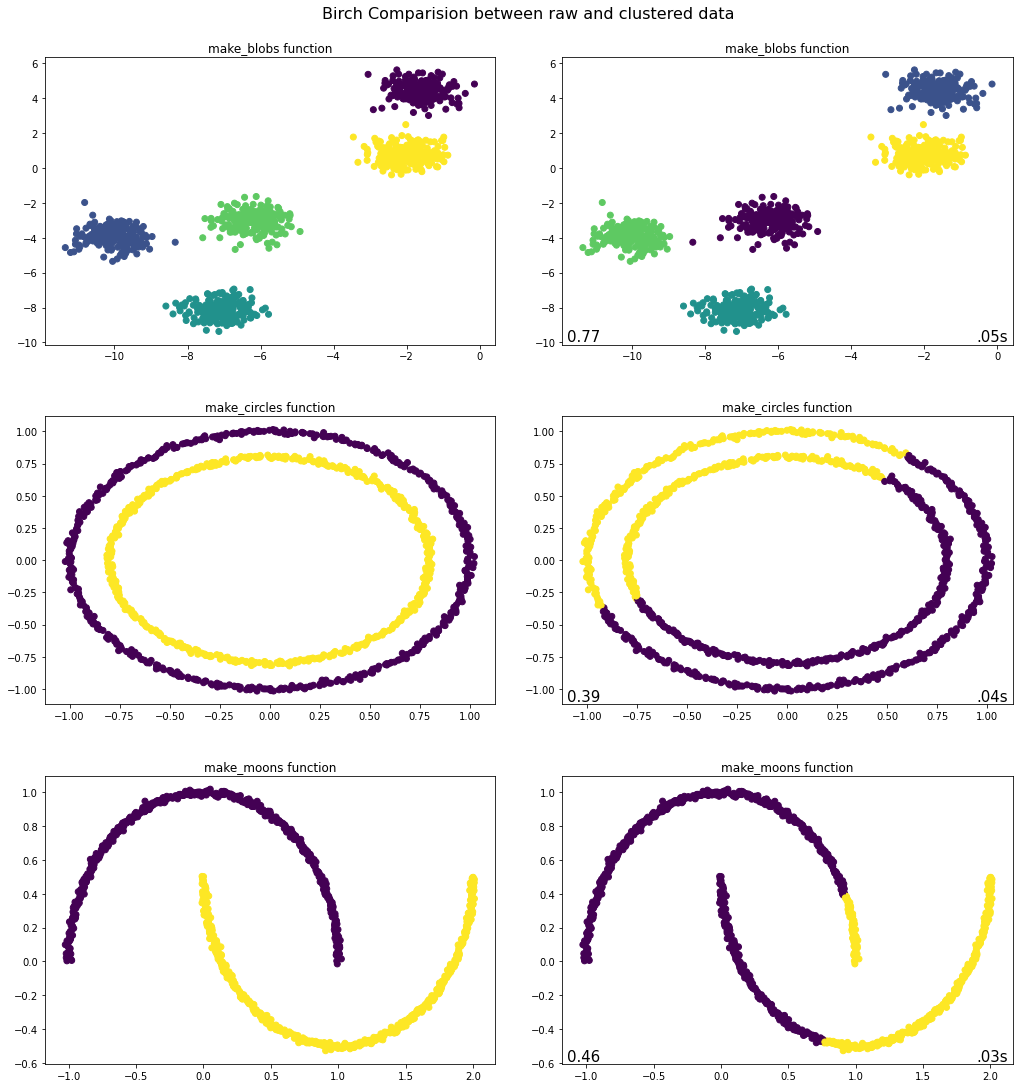

In [13]:
from sklearn.cluster import Birch
evaluate.plot_raw_vs_predict(Birch)

### Takeaways from BIRCH Python Implementation

In general, BIRCH performed quite similar to the Agglomerative Clustering algorithm. Again, BIRCH only worked for the `make_blobs` function where it correctly assigned all instances to five clusters. This does not come as a surprise, because BIRCH applies Agglomerative Clustering as a last step (default setting in [Scikit-learn's implementation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html) of BIRCH). The main advantage of BIRCH is its scalability and speed. The tested datasets were fairly small, which is why the effect on computational speed was quite limited. Nevertheless, BIRCH was faster for all three datasets. This effect would have been more pronounced if the size of the datasets were larger.

## C. Density-Based <a name="density"/>

### a. DBSCAN <a name="dbscan"/>

DBSCAN stands for density-based spatial clustering of applications with noise. It is efficient to find arbitrary shaped clusters and clusters with noise (i.e. outliers).
The main concept in this algorithm is, a point will belong to a cluster if it close to many points from that cluster, which means the point is in a dense region.


Certain literature from Ester et.al might be helpful to understand the algorithm and the parameters.

Epsilon neighborhood of a point: The Eps neighborhood of a point p, in a dataset D, denoted by $N_{Eps}(p)$, is defined as

$$N_{Eps}(p) = \{q \in D \mid dist(p,q) \leq \epsilon\}$$

where $\epsilon$ is the radius of the neighborhood around the point.

Density at a point p: Number of points within a circle of radius $\epsilon$ from point p. 

Dense Region: For each point in the cluster, the circle with radius $\epsilon$ contains at least minimum number of points. In the algorithm we can specify this minimum number of points as a parameter min_samples. In some literature this is mentioned as MinPts.

Core point: A point is a core point if there are at least “minimum number of points” in its surrounding area with radius $\epsilon$.

Border point: A point is a border point if it is reachable from a core point and there are less than “minimum number of points” within its surrounding area.

Outlier: A point is an outlier if it is neither a core point nor a border point.

Direct density reachable: A point p is directly density reachable from another point q if q is a core point and p is in the $\epsilon$ neighborhood of q.

Density reachable: A point p is density reachable from a point q wrt $\epsilon$ and Minimum number of points 

if there is a chain of points $p_l$, $p_2$, ... $p_n$, $p_l$ = $q$, $p_n$ = $p$ 
such that $p_{i+1}$ is directly density-reachable from $p_i$.
Density-reachability is a canonical extension of direct density-reachability.

Density connected: A point p is density reachable from a point q wrt $\epsilon$ and Minimum number of points 
if there is a point o such that both p and q are Density reachable from o.

![The-concepts-density-connectivity.png](The-concepts-density-connectivity.png)


A density-based cluster is defined as a group of density connected points. 

#### The steps of the algorithm are outlined below.

1. For each point $x_{i}$, determine how many points are present in the $\epsilon$ neighborhood.
2. If this count is greater or equal to the minimum number of points, then mark the point as a core point.
3. Cluster formation starts.  Find recursively all its density connected points and assign them to the same cluster as the core point.
4. Iterate through the remaining unvisited points in the dataset.
5. Every core point will be assigned to a new cluster unless some of the core points share neighborhood points, they will be included in the same cluster.
6. Those points that do not belong to any cluster are treated as outliers or noise.


#### In scikit learn there are two key parameters of DBSCAN

**eps** : The maximum distance between two samples for one to be considered as in the neighborhood of the other. With a smaller value more points will be considered as outlier. The default value is 0.5.

**min_samples** : The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.  With a higher value, more points will be considered as outlier. The default value is 5.

#### Output from the algorithm ###
**clusterer.labels_** : All the different cluster labels created by the algorithm are provided as output. The outliers can be found by the label of -1. 

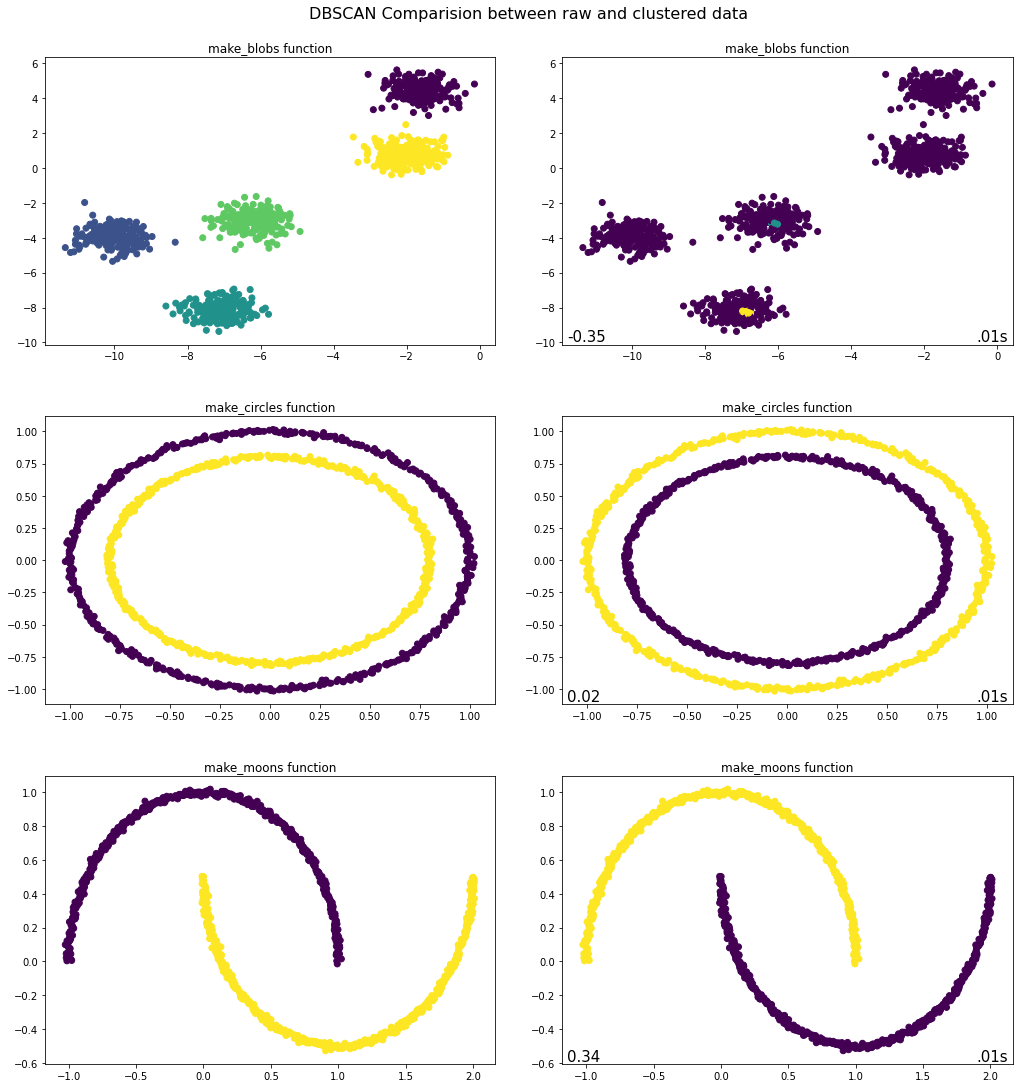

In [20]:
from sklearn.cluster import DBSCAN
evaluate.plot_raw_vs_predict(DBSCAN, eps = 0.1, min_samples = 10)

### Takeaways from DBSCAN Python Implementation

1. Blobs - With a small $eps$ value and a big $min$_$samples$ value, there will not be many core points and hence most of the points will not be able to be density connected. The result is in line with our understanding. With $eps = .1$ it's not able to identify any meaningful clusters and most of the points are outliers. If we increase the value to $eps = .3$, the clustering will be more accurate.

2. Circles - As the points in the 2 circles are very close, to put them in 2 different clusters, the $eps$ value needs to be very small, $eps = .1$.  Any other $eps$ value higher than this will result in all points belonging to the same cluster.

3. Moons - As the moons are widely separated, the DBSCAN algorithm is able to cluster accurately with $eps$ values from .1 to .4.  Which means the algorithm is able to find the density connected points. Any $eps$ value higher than this will result in all points belonging to the same cluster. Although the clustering is correct, the Silhouette score is not high because of the non-convex nature of the clustering. 

### b. HDBSCAN <a name="hdbscan"/>

HDBSCAN (Hierarchical Density-Based Spatial Clustering and Application with Noise) is an unsupervised clustering algorithm which expands the DBSCAN algorithm and integrates the hierarchical approach. 
As we know the DBSCAN algorithm requires the input parameters epsilon and min_samples which requires pre domain knowledge about data.  DBSCAN algorithm is not so efficient where there are different densities present in the data.  
In HDBSCAN, the algorithm works for varying epsilon hence it can also be referred as non-parametric algorithm.  This makes the algorithm very efficient even with different densities in the data.

#### Below are the steps performed by the algorithm.
1.	Transform the space according to the density/sparsity.

The foundation of the algorithm is based on single linkage clustering and is a bottom-up approach of agglomerative clustering where at the bottom all individual data points are considered as individual clusters and based on the similarity between the data points, the clusters are combined and in the end there is only one single cluster.
To make the model robust to outliers, in this very first step a new distance metric, mutual reachability distance is created which can be defined as:

$$d_{mreach}(a,b) = max\{core_k(a), core_k(b), d(a,b)\}$$

where $core_k(a)$ and $core_k(b)$ are the core distances defined for parameter $k$ for the points $a$ and $b$.

- $k$ is the required minimum number of points.

- $d(a,b)$ is the original metric distance between $a$ and $b$.

- $d_{mreach}(a,b)$ is the mutual reachability distance.

2.	Build the minimum spanning tree of the distance weighted graph.

Conceptually in this step, the data is considered as a weighted graph with the data points as vertices and an edge between any two points with weight equal to the mutual reachability distance of those points.

3.	Construct a cluster hierarchy of connected components.

The next step is to create a hierarchy of connected components. The concept is, two points will be connected based on the edge which represents the mutual reachability between two points.  

4.	Condense the cluster hierarchy based on minimum cluster size.

In this step, a smaller condensed tree is created. Using the input parameter, minimum cluster size, at each split the condition is checked whether one of the new clusters created by the split has fewer points than the minimum cluster size or not. If it has fewer points, then it will not be considered as cluster instead, it will be considered as ‘points falling out of a cluster’.  Otherwise it will be considered as a persistent cluster. 

5.	Extract the stable clusters from the condensed tree.

In the last step the clusters are selected based on the excess of mass (eom).  This method, which refers back to the research by Hartigan, is recommended by Campello et al. as the optimal global solution to the problem of finding clusters with the highest
stability. HDBSCAN’s selection algorithm traverses the condensed cluster tree bottom-up and selects the cluster with highest stability on each path. If a cluster is selected then any cluster that is a descendant of it cannot be a cluster.


#### The key parameters for the algorithm are as below.

**min_cluster_size** is the smallest size grouping that we wish to consider a cluster.  If we increase the value, then smaller number of clusters will be created.  The default is five.

However, there is another parameter which has significant effect in this intuition.

**min_samples** is yet another very important parameter which can be used to control the conservativeness of clustering.  The larger the value of min_samples you provide, the more conservative the clustering – more points will be declared as noise, and clusters will be restricted to progressively more dense areas.

If not specified the default value for this parameter will be same as min_cluster_size.

**cluster_selection_epsilon**  ensures that clusters below the given threshold are not split up any further.

**alpha** is part of the RobustSingleLinkage code, but flows naturally into HDBSCAN.  The default value is 1.0.  It’s better not to change this parameter as adjusting alpha will result in recomputing the hard computation of the single linkage tree.


#### Output from the algorithm ###
**clusterer.labels_** : All the different cluster labels created by the algorithm are provided as output. The outliers can be found by the label of -1. 

**clusterer.probabilities_** : For each cluster we have the $\lambda_p$ for each point $p$ in that cluster; which measures the strength of cluster membership for each point.

**outlier_scores_** : This output is a vector of score values, one for each data point that was fit. Higher scores represent more outlier like objects. Selecting outliers via upper quantiles is often a good approach.


#### Soft clustering for HDBSCAN ###
To implement soft clustering, we need to produce a method of providing a soft membership vector for a given point across the selected clusters of a clustering. Ideally, we want this to be interpretable as a probability of being a member of that cluster. 

In [15]:
import hdbscan
evaluate.plot_raw_vs_predict(hdbscan.HDBSCAN)

ModuleNotFoundError: No module named 'hdbscan'

### Takeaways from HDBSCAN Python Implementation
1. Blobs - The HDBSCAN performs well on this dataset, clusters accurately, and identifies outliers.

2. Circles - The algorithm performs well and clusters accurately, but the Silhouette score is low because of the non-convex nature of the clustering. Thus the Silhouette score is not meaningful.

3. **`Moons - Instead of two, it identifies three clusters.  If we increase the value of min_cluster_size to ten the algorithm works well.`**

## D. Expectation Maximization <a name="em"/>

The Expectation Maximization algorithm (EM) is an Maximum Likelihood Estimator (MLE) (for a closer examination of the relationship between MLE, MAP and EM see [1]). In the context of clustering it is also referred to as a "soft cluster" algorithm, since it iteratively estimates the probabilites that a given set of data belongs to either cluster. Therefore it is split up in two different steps, the E-Step and the M-Step, which we will delve into now.

### E-Step

The **E** in **E**-Step stands for "**E**xpectation", hence we want to calculate values which illustrate the expectation that a given set of data belongs to either of the given $\theta$s (the $\theta$s represent our different clusters). In fact, $\theta$ displays the probability that a certain event happened in one cluster. For a coin toss, this would look like:

$$
\theta_A\ =\ 0.6\newline
\theta_B\ =\ 0.5
$$

which displays the respective probabilities for coin A and coin B showing heads. These initial values are randomly created in the range between $0$ and $1$. As we already discussed in the [K-Means](#kmeans) section, this algorithm also needs beforehand a concrete input of how many clusters it should look for. After the $\theta$ values are initialized/provided we turn to datasets. Let's imagine we have the following datasets (where $H$ is for heads and $T$ is for tails):

$$
1.\ [HHTTHHTHTT]\newline
2.\ [HHHTHHHHHH]
$$

Since we know what the probability of heads is for each coin, we can now calculate the probability that either of those datasets belong to either of those coins. For the first dataset with five heads and five tails, we can calculate the probability that it belongs to coin A as follows:

$$
P(coin\ A|\ [HHTTHHTHTT]) = \frac{{0.6^5}*{0.4^5}}{{{0.6^5}*{0.4^5}}+{{0.5^5}*{0.5^5}}} = 0.45
$$

For the second dataset, the probability that it belongs to coin A would look like:

$$
P(coin\ A|\ [HHHTHHHHHH]) = \frac{{0.6^9}*{0.4^1}}{{{0.6^9}*{0.4^1}}+{{0.5^9}*{0.5^1}}} = 0.8
$$

Using this formula we can calculate the probabilities for all datasets for all our $\theta$s. 

The "algorithm" uses this function to calculate all the expectations for coin A. The expectations for coin B are easily computed, since we can just do 1 - probability of coin A. Once we have all the data, we can multiply our expectation with the number of events we want to measure. Meaning, we calculate:

$$
0.45∗5=2.2
$$

### The M-Step

Now we know that if the first dataset would belong to coin A, we would expect heads 2.2 times and tails 2.2 times. Once we have that full table, all we do, is calculate the MLE. We sum up the values for the occurances of heads and tails for each coin, and calculate the probability of heads for each coin. This is also called the **M(aximization)**-step. These two probabilities are our new values, with which we re-run our expectation calculation. We can repeat this as many times as we want. The nice thing about this is that in the end we can approximate the real $\theta$s, viz. after ten iterations we have a posterior maximization value of 0.8 for coin A tossing heads.

We can make use of the `GaussianMixture` function from `sklearn` which implemented the EM algorithm.

In [21]:
from sklearn.mixture import GaussianMixture

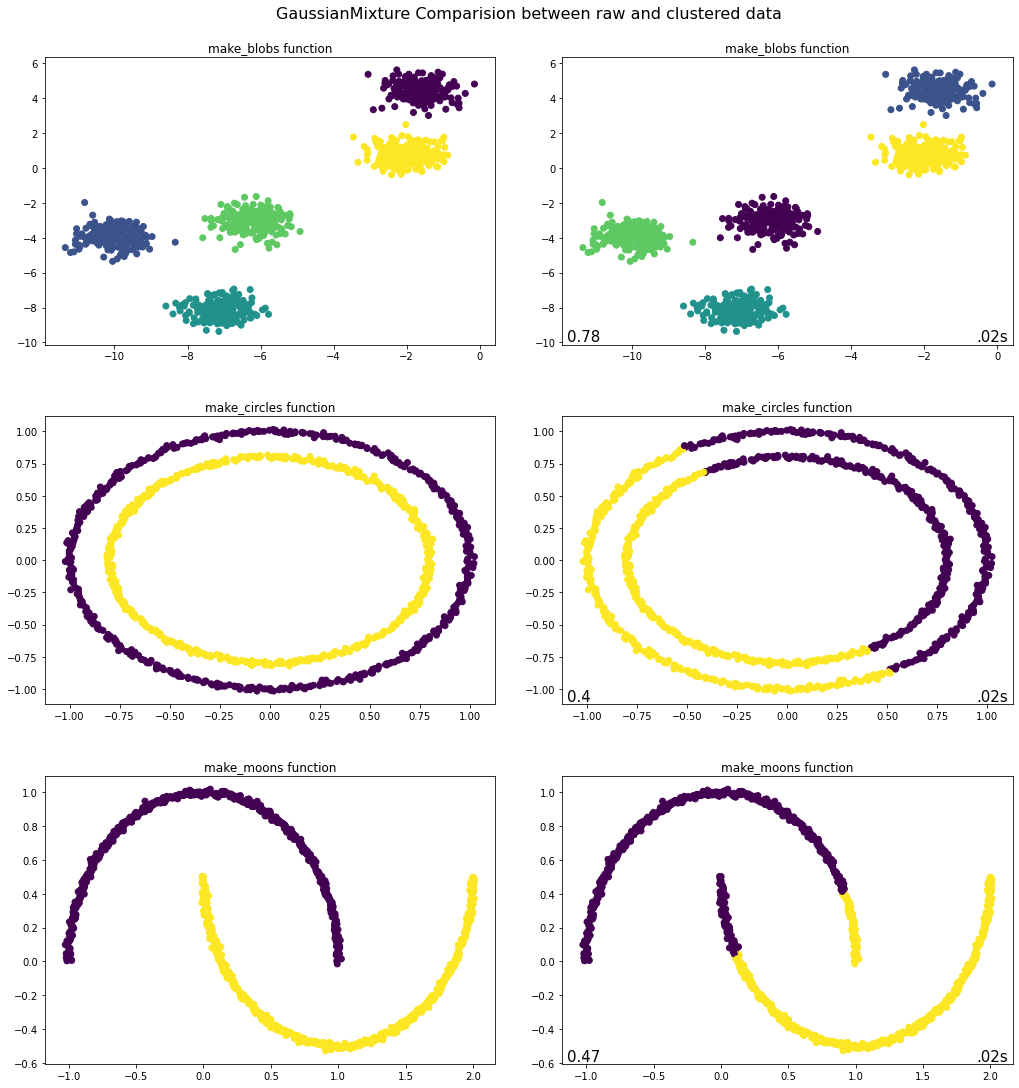

In [22]:
evaluate.plot_raw_vs_predict(GaussianMixture, init_params='kmeans', max_iter = 100)

### Takeaways from EM Python Implementation

**`Mr. Yannik to complete.`**

## E. Affinity Propagation <a name="ap"/>

## Affinity Propagation ##
Affinity Propagation is an unsupervised clustering algorithm based on the concept of "message passing" (i.e. voting systems) between data points.  This algorithm does not require the number of clusters as input.  
It applies the concept of "exemplars", which are members of the input set that are representative of clusters.
The main drawback of this algorithm is that it is computationally expensive.
    
![Message-Passing-in-Affinity-Propagation](Message-Passing-in-Affinity-Propagation.png)

### Steps of the algorithm ### 


1. The algorithm first calculates the Similarity Matrix for all the data points.  The similarity is calculated as negative squared Euclidian distance.
$$s(i, k) = - \lvert\lvert x_i - x_k \rvert\rvert^2$$


2. The diagonal elements of the matrix are zero as per the above formula. If the diagonal values are not modified, all the elements will be exemplars and many clusters will be formed. There are two ways to control this situation: (1) modify the values by the minimum value of the similarities between points, or (2) modify the values by the median value of the similarities. In the former case, the least number of clusters will be formed whereas in the latter case a moderate number of clusters will be formed.


3. As a next step it creates the "responsibility" matrix $R$ which has values $r(i, k)$ that quantify how well-suited $x_k$ is to serve as the exemplar for $x_i$, relative to other candidate exemplars for $x_i$. The greater the value, the higher the chance that $x_k$ is an exemplar for $x_i$. The calculation is done by the definition below.

    $$r(i, k) \leftarrow s(i, k) - \max\limits_{k' s.t. k' \neq k}\{ a(i, k') + s(i, k') \}$$

    As the formula states, the responsibility of $k$ towards $i$ will decrease as the availability of some other $k'$ to $i$ increases.


4. The damping factor is used in the calculation as provided below. This is in order to avoid numerical oscillations when updating these values.

    $$R = R * damping + (1 - damping) * R_{new}$$


5. The "availability" matrix $A$ contains values $a(i, k)$ that represent how "appropriate" it would be for $x_i$ to pick $x_k$ as its exemplar, taking into account other points' preference for $x_k$ as an exemplar. 

    For the diagonal elements (self availabilities) the calculation is done by the definition below.

    $$a(k, k) \leftarrow \sum\limits_{i' \neq k}\max(0, r(i', k))$$

    $a(k, k)$ reflects accumulated evidence that point $k$ is suitable to be an exemplar, based on the positive 
    responsibilities of $k$ towards other elements.


6. For the off diagonal elements the calculation is done by the definition below.

    $$a(i, k) \leftarrow \min\{0, r(k,k) + \sum\limits_{i' s.t. i' \notin \{i, k\}}{\max\{0, r(i', k)\}}$$

    The formula states that availability is a self-responsibility of $k$ plus the positive responsibilities of $k$ towards
    elements other than $i$. The intuition to include only positive responsibilities is: an exemplar should be positively 
    responsible to some data points, regardless of the negative responsibilites to other data points.
    If self-responsibility is negative, it means that $k$ is more suitable to belong to another exemplar, rather than being an 
    exemplar.
    
    The damping factor is used in a way similar to that described above.


7. The values are updated through iterations. Iterations are performed until either the cluster boundaries remain unchanged over a number of iterations, or some predetermined number (of iterations) is reached. 


8. The Criterion matrix is calculated after the updating is terminated. The Criterion matrix $C$ is the sum of $R$ and $A$. The formula is:

    $$c(i,k) \leftarrow r(i,k) + a(i,k)$$
    
    An element $i$ will be assigned to an exemplar $k$ which is not only highly responsible but is also highly available to $i$.
    

9. The exemplars extracted from the final matrices are those whose 'responsibility + availability' sum is positive (i.e. $(r(i,i)+a(i,i))>0$)


10. For point $i$, the $k$ with maximum $r(i, k) + a(i, k)$ represents point $i’s$ exemplar or cluster.

### Key parameters as per scikit learn ###

**damping** - Damping factor (between 0.5 and 1) is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping). This in order to avoid numerical oscillations when updating these values (messages).

**max_iter** - Maximum number of iterations. Default is 200.

**preference** - Preferences for each point - points with larger values of preferences are more likely to be chosen as exemplars. The number of exemplars, i.e. of clusters, is influenced by the input preferences value. If the preferences are not passed as arguments, they will be set to the median of the input similarities.

This preference value indicates how strongly a data point thinks itself should be an exemplar. It is the diagonal value of the similarity matrix, $S$. If we choose to leave this value unmodified, we will see almost no clustering as most data points choose to be an exemplar for themselves. If we haven’t got a priori knowledge of the data points it is advised to start with a preference equal to the median of the input similarities.
Intuitively, if we want Affinity Propagation to be less eager in splitting clusters we can set the preference value lower.

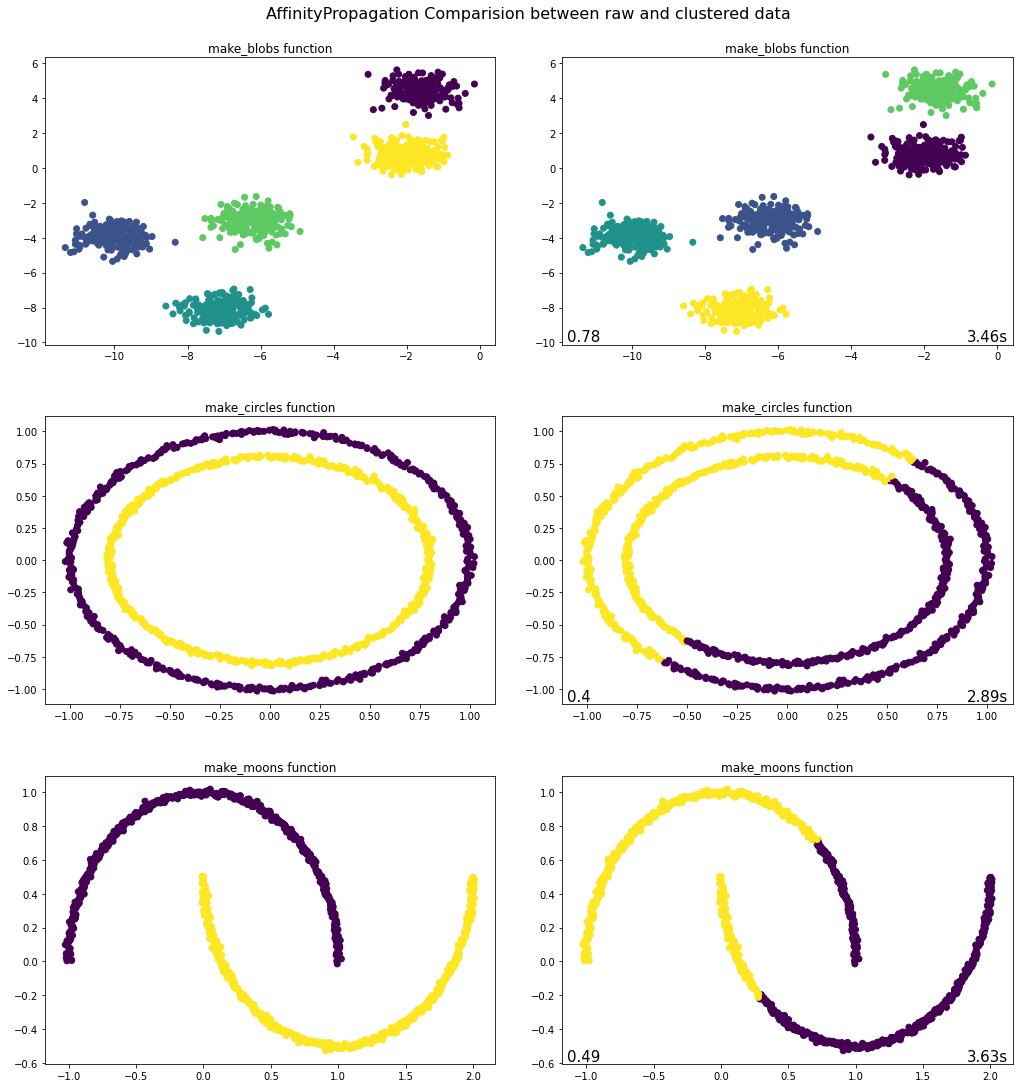

In [23]:
from sklearn.cluster import AffinityPropagation
evaluate.plot_raw_vs_predict(AffinityPropagation, random_state = 1, damping=.9, preference = -400)

### Takeaways from Affinity Propagation Python Implementation
1. Blobs - The clustering result looks good, and the Silhouette score is also high.

2. Circles - The algorithm could identify two clusters but differently than the original dataset. The reason is, the similarity matrix is calculated based on the Euclidian distance and if we look into the shape, the points belonging to different circles are closer than the points belonging to same circle. So, the algorithm considered the points from different circles in a cluster.

3. Moons - In this case also the algorithm has identified two clusters differently and the reason is the same as that outlined above.


# Bibliography 


## Expectation Maximization

[1] https://stats.stackexchange.com/questions/235070/relation-between-map-em-and-mle/524802#524802

*Note: An exhaustive blogpost which explains MLE, MAP and EM and their relationship.*

[2] https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

*Note: This is the exhaustive documentation of all available datasets and samples generator webpage. It offers deeper insights into which parameters else each function has.*

[3] T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, Springer, 2009.

*Note: This reference was directly taken from `sklearn`s documentation!* 

## Silhouette Score

- https://en.wikipedia.org/wiki/Silhouette_(clustering)
- https://en.wikipedia.org/wiki/Convex_set
- Machine Learning: A Probabilistic Perspective (Adaptive Computation and Machine Learning) by Kevin P. Murphy
- https://towardsdatascience.com/performance-metrics-in-machine-learning-part-3-clustering-
- Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurelien Geron (2020)

## Fowlkes-Mallows Index
- https://scikit-learn.org/stable/modules/clustering.html#fowlkes-mallows-scores

## Partition

- Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurelien Geron (2020)
- https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html  
- https://scikit-learn.org/stable/modules/clustering.html#spectral-clustering
- https://towardsdatascience.com/spectral-clustering-aba2640c0d5b
- http://www.tml.cs.uni-tuebingen.de/team/luxburg/publications/Luxburg07_tutorial.pdf
- https://towardsdatascience.com/spectral-clustering-82d3cff3d3b7
- https://www.mygreatlearning.com/blog/introduction-to-spectral-clustering/

## Hierarchial

- Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurelien Geron (2020)
- Data Mining - Concepts & Techniques by Jiawei Han, Micheline Kamber, Jian Pei (2012)
- https://www2.cs.sfu.ca/CourseCentral/459/han/papers/zhang96.pdf
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html
- https://towardsdatascience.com/machine-learning-birch-clustering-algorithm-clearly-explained-fb9838cbeed9
- https://scikit-learn.org/stable/modules/clustering.html#birch

## DBSCAN

- https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf?source=post_page
- https://www.researchgate.net/figure/The-concepts-directly-density-reachability-density-reachability-and-density_fig1_259461372

## HDBSCAN

- https://hdbscan.readthedocs.io/en/0.8.6/how_hdbscan_works.html


## Affinity Propagation

- https://towardsdatascience.com/unsupervised-machine-learning-affinity-propagation-algorithm-explained-d1fef85f22c8
- https://en.wikipedia.org/wiki/Affinity_propagation#:~:text=In%20statistics%20and%20data%20mining,message%20passing%22%20between%20data%20points.
- https://www.researchgate.net/figure/Message-Passing-in-Affinity-Propagation-4_fig1_321462147